### IMPORT USEFUL LIBRARY

About Dataset - 
Dataset 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import iplot

### LOAD DATASET

In [2]:
df0 = pd.read_csv('../input/design-time-product-analysis/Stress analysis using FEA.csv')
df0.head()

,# Design Points of Design of Experiments,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,# Central Composite Design : Face-Centered : E...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#,P1 - DS_Bar_length@Extrude1@Trohanterna_sipka....,P2 - DS_Bar_diameter@Sketch1@Trohanterna_sipka...,P3 - DS_Bar_end_thickness@Sketch2@Trohanterna_...,P4 - DS_Radius_trochanteric_unit@Fillet1@Troha...,P5 - DS_Radius_bar_end@Sketch2@Trohanterna_sip...,P6 - DS_clamp_distance@Distance3@Sklop_Femur-F...,P7 - Total Deformation Maximum (mm),P8 - Equivalent Stress - Fiksator Maximum (MPa),P9 - Total Mass (kg),P10 - Upper Femur Mass (kg),P11 - Lower Femur Mass (kg),P12 - Fixator Mass (kg)
2,Name,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
3,1,175,9,5.25,6.5,8,14.5,8.850985077,261.8651189,0.797439059865827,0.162877832743993,0.381844525174461,0.249166901947372
4,2,100,9,5.25,6.5,8,14.5,10.56505916,324.3839573,0.759967361082037,0.162871357310206,0.381832074130171,0.211714129641659


In [3]:
df_main = pd.read_csv('../input/design-time-product-analysis/Stress analysis using FEA.csv',skiprows=4,names=['Name',
                       'Bar length',
                       'Bar diameter',
                       'Bar end thickness',
                       'Radius trochanteric unit',
                       'Radius bar end',
                       'Clamp distance',
                       'Total Deformation Maximum',
                       'Equivalent Stress',
                       'Total Mass (kg)',
                       'Upper Femur Mass (kg)',
                       'Lower Femur Mass (kg)',
                       'Fixator Mass'], usecols=['Bar length',
                         'Bar diameter',
                         'Bar end thickness',
                         'Radius trochanteric unit',
                         'Radius bar end',
                         'Clamp distance',
                         'Total Deformation Maximum','Equivalent Stress',
                         'Equivalent Stress','Upper Femur Mass (kg)','Lower Femur Mass (kg)',
                         'Fixator Mass'] )
df_main.head()

,Bar length,Bar diameter,Bar end thickness,Radius trochanteric unit,Radius bar end,Clamp distance,Total Deformation Maximum,Equivalent Stress,Upper Femur Mass (kg),Lower Femur Mass (kg),Fixator Mass
0,175.0,9.0,5.25,6.5,8,14.5,8.850985,261.865119,0.162878,0.381845,0.249167
1,100.0,9.0,5.25,6.5,8,14.5,10.565059,324.383957,0.162871,0.381832,0.211714
2,137.5,9.0,5.25,6.5,8,14.5,9.622548,308.925213,0.162872,0.381877,0.230441
3,250.0,9.0,5.25,6.5,8,14.5,7.609888,206.276908,0.162884,0.381513,0.286620
4,212.5,9.0,5.25,6.5,8,14.5,8.190292,225.422597,0.162880,0.381717,0.267893


In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Bar length                 89 non-null     float64
 1   Bar diameter               89 non-null     float64
 2   Bar end thickness          89 non-null     float64
 3   Radius trochanteric unit   89 non-null     float64
 4   Radius bar end             89 non-null     int64  
 5   Clamp distance             89 non-null     float64
 6   Total Deformation Maximum  89 non-null     float64
 7   Equivalent Stress          89 non-null     float64
 8   Upper Femur Mass (kg)      89 non-null     float64
 9   Lower Femur Mass (kg)      89 non-null     float64
 10  Fixator Mass               89 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 7.8 KB


### Function check missing value

In [5]:
def checkmiss(data):
    return data.isnull().sum()/data.shape[0]*100

In [6]:
checkmiss(df_main)

Bar length                   0.0
Bar diameter                 0.0
Bar end thickness            0.0
Radius trochanteric unit     0.0
Radius bar end               0.0
Clamp distance               0.0
Total Deformation Maximum    0.0
Equivalent Stress            0.0
Upper Femur Mass (kg)        0.0
Lower Femur Mass (kg)        0.0
Fixator Mass                 0.0
dtype: float64

### Skewness of Normal distribution

<AxesSubplot:ylabel='Frequency'>

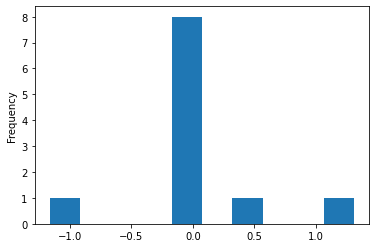

In [7]:
df_main.skew().plot(kind = 'hist')

### InterQuentile Range 

In [8]:
def quntile(data) :
    Q1 = data.quantile(0.25)#0.25
    Q3 = data.quantile(0.75)# 0.75
    IQR = Q3 - Q1
    return (data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] )
    

In [9]:
quntile(df_main).skew()

Bar length                   0.004184
Bar diameter                 0.000000
Bar end thickness           -0.042515
Radius trochanteric unit     0.000000
Radius bar end               0.000000
Clamp distance              -0.042515
Total Deformation Maximum   -0.010715
Equivalent Stress            0.302647
Upper Femur Mass (kg)        0.000000
Lower Femur Mass (kg)       -1.290376
Fixator Mass                 0.617414
dtype: float64

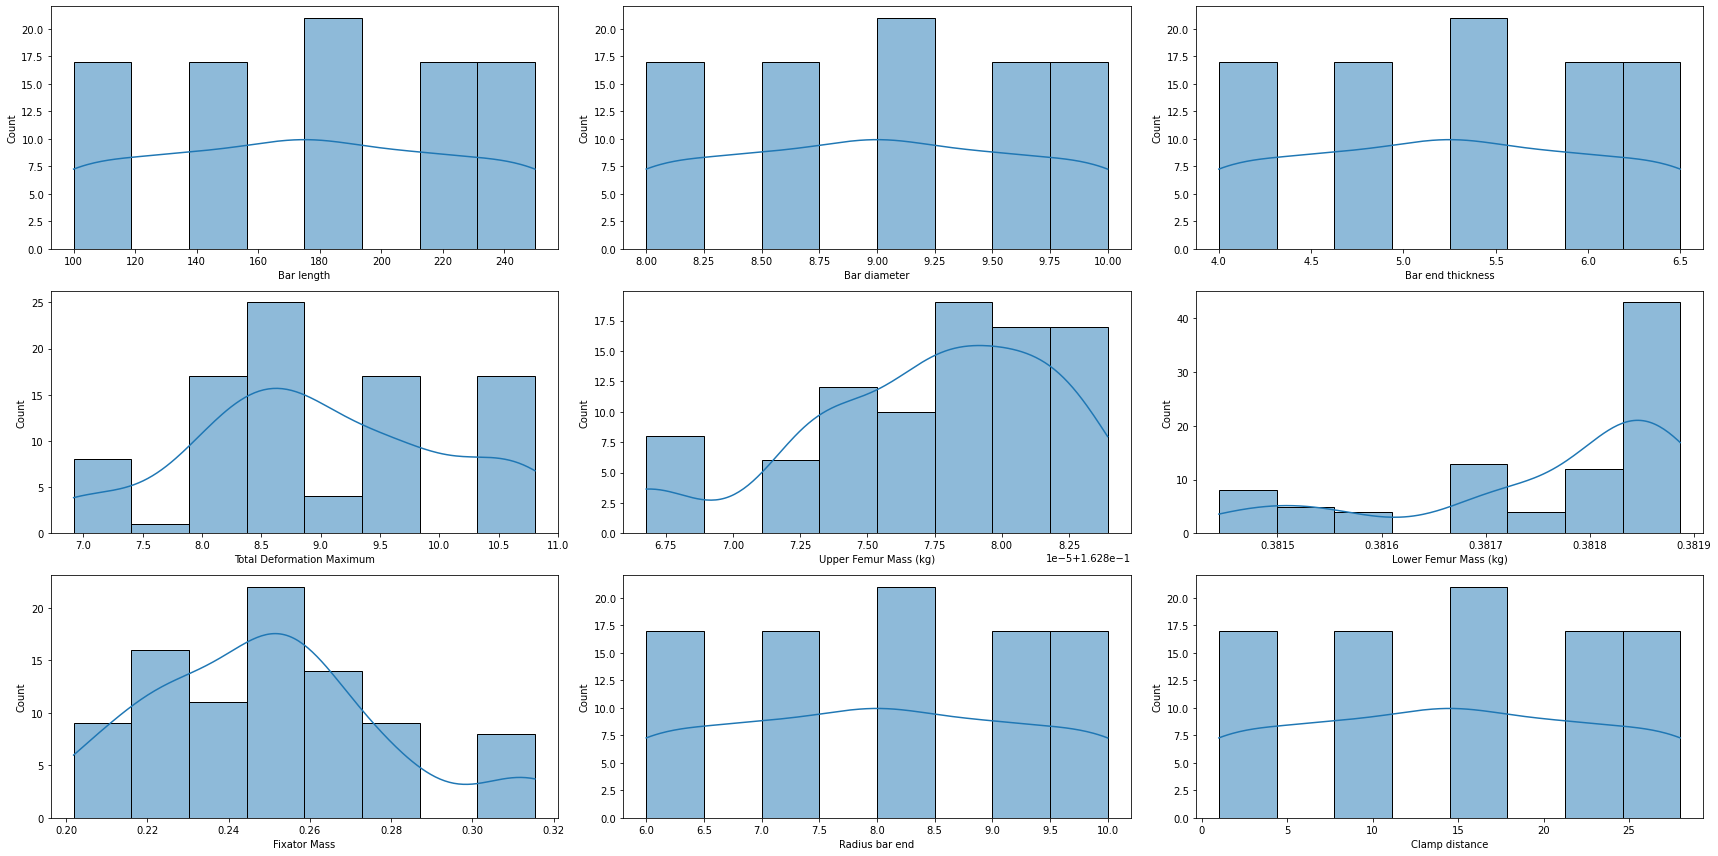

In [10]:
fig ,ax = plt.subplots(3,3,figsize= (24,12))
sns.histplot(df_main['Bar length'],kde = True,ax = ax[0,0])
sns.histplot(df_main['Bar diameter'],kde = True,ax = ax[0,1])
sns.histplot(df_main['Bar end thickness'],kde = True,ax = ax[0,2])
sns.histplot(df_main['Total Deformation Maximum'],kde = True,ax = ax[1,0])
sns.histplot(df_main['Upper Femur Mass (kg)'],kde = True,ax = ax[1,1])
sns.histplot(df_main['Lower Femur Mass (kg)'],kde = True,ax = ax[1,2])
sns.histplot(df_main['Fixator Mass'],kde = True,ax = ax[2,0])
sns.histplot(df_main['Radius bar end'],kde = True,ax = ax[2,1])
sns.histplot(df_main['Clamp distance'],kde = True,ax = ax[2,2])
fig.tight_layout()
plt.show()


### Observation

### Correlation Matrix

<AxesSubplot:>

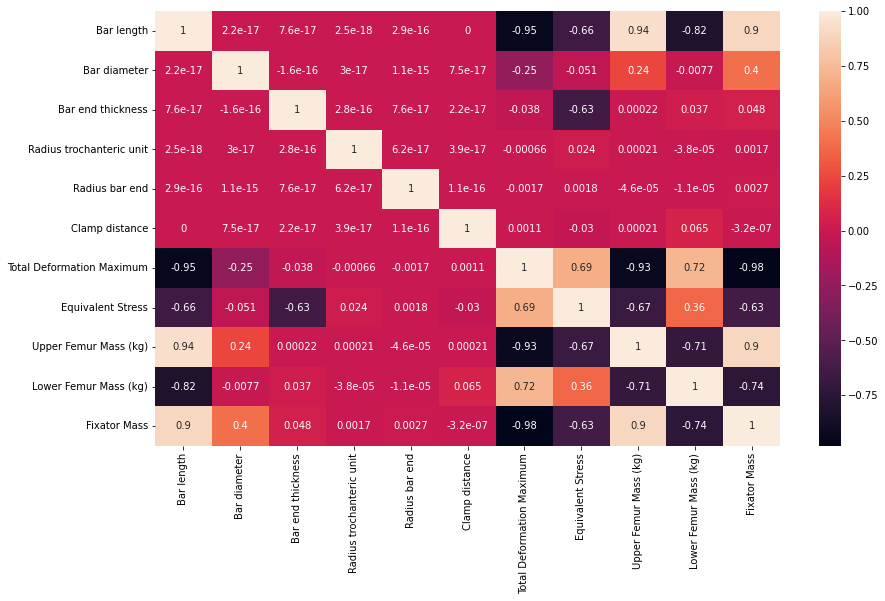

In [11]:
plt.figure(figsize = (14,8))
sns.heatmap(df_main.corr(),annot = True)


### Geometry of Structure

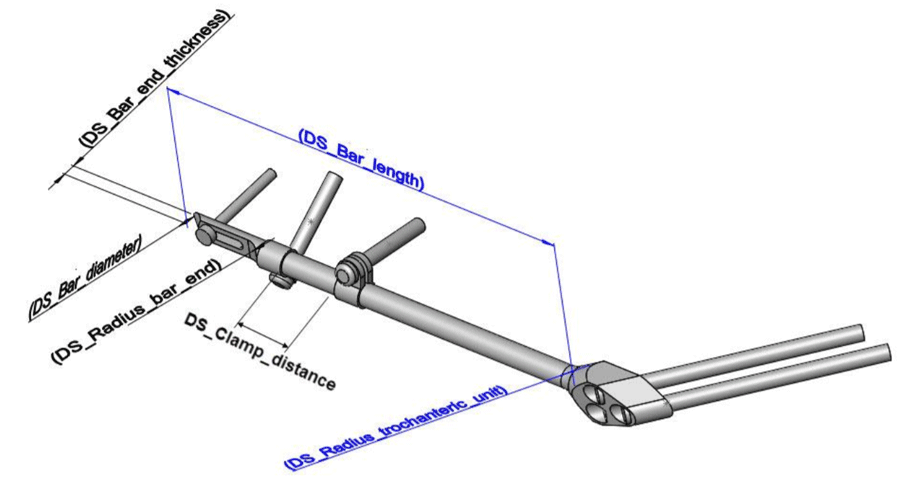

### Obervateion - 
#### Displacement Correlation from plot  
##### Radius trochanteric unit---> -0.00066
##### Radius bar end          ---> -0.0017
##### Clamp distance          ---> 0.0011
##### which are very less as compare to other existing strong correlation i.e. why drop these features

#### Stress Correlation from plot  
##### Radius trochanteric unit---> 0.024
##### Radius bar end          ---> 0.0018
##### Clamp distance          ---> -0.03
##### which are very less as compare to other existing strong correlation i.e. why drop these features



### Remove the weak correlated columns

In [12]:
df_data = df_main.drop(columns= ['Radius trochanteric unit', 'Radius bar end', 'Clamp distance'],axis = 1)
df_data

,Bar length,Bar diameter,Bar end thickness,Total Deformation Maximum,Equivalent Stress,Upper Femur Mass (kg),Lower Femur Mass (kg),Fixator Mass
0,175.0,9.0,5.250,8.850985,261.865119,0.162878,0.381845,0.249167
1,100.0,9.0,5.250,10.565059,324.383957,0.162871,0.381832,0.211714
2,137.5,9.0,5.250,9.622548,308.925213,0.162872,0.381877,0.230441
3,250.0,9.0,5.250,7.609888,206.276908,0.162884,0.381513,0.286620
4,212.5,9.0,5.250,8.190292,225.422597,0.162880,0.381717,0.267893
...,...,...,...,...,...,...,...,...
84,212.5,8.5,5.875,8.432162,211.259600,0.162880,0.381714,0.258738
85,100.0,10.0,6.500,10.396822,377.156050,0.162873,0.381829,0.222944
86,137.5,9.5,5.875,9.486397,260.258230,0.162876,0.381881,0.238019
87,250.0,10.0,6.500,6.917634,190.571404,0.162883,0.381570,0.315407


<!-- ## Observation - 
The columns correlated very small in magnitude we have been dropping them from the dataset, however, 
we have selected those columns which indirectly affected the Stress, Displacement, and Fixator Mass i.e. 
why we can't ignore those columns also can't account directly.

To eliminate the problem we will use the Recursive Feature Elimination (RFE) method applied with the goal to explore the 
relevance ranking of the subsets of the input features.RFE is a method that performs a backward feature elimination. 
The algorithm begins with the set of all features and successively eliminates the feature which induces the smallest
effect on the output features. It can be applied by using the selected algorithms, in our case - simple linear 
regression, SVM, Decision Trees, Random Forest, and Gradient Boosting regressors. 
[https://www.kaggle.com/code/milanzdravkovic/design-time-product-structural-analysis-assistance/notebook]

What is "RFE" algorithm?
RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used 
in the core of the method, is wrapped by RFE, and used to help select features.[Source] -->

### Importing the Useful Library

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,  r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.feature_selection import RFECV

### Model Training for Equvalent Stress  evualation

In [14]:
drop_clm = ['Total Deformation Maximum' , 'Equivalent Stress' ,'Fixator Mass' ]
X = df_data.drop(columns=drop_clm,axis= 1 )
X.head(2)

,Bar length,Bar diameter,Bar end thickness,Upper Femur Mass (kg),Lower Femur Mass (kg)
0,175.0,9.0,5.25,0.162878,0.381845
1,100.0,9.0,5.25,0.162871,0.381832


### Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
def split(X,Y) :
    X_train ,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size= 0.15,random_state=42,shuffle=True)
    
    print('Shape of X_train Dataset : ', X_train.shape)
    print('Shape of X_test Dataset : ', X_test.shape)
    
    print('Shape of Y_train Dataset : ', Y_train.shape)
    print('Shape of Y_test Dataset : ', Y_test.shape)
    return X_train ,X_test ,Y_train,Y_test

### Model Collection 

In [17]:
def Regress_model(Y_test,X_test,X_train,Y_train):
    
    def Ran_For_Regress(Y_test,X_train,Y_train):
        
        RFR = RandomForestRegressor()
        
        RFR.fit(X_train,Y_train )
        prediced_data = RFR.predict(X_test)
        print('Regression score Random Forest Regressor   :   ',r2_score(Y_test,prediced_data))
        return prediced_data
    
    def KNN_regressor(Y_test,X_train,Y_train) :
        rg = KNeighborsRegressor()
        
        para_grid = {'n_neighbors' : [12,14,16,5,6,8,10,20,30] ,'p':[2,3,4,5,6]}
        Regrecv = GridSearchCV(rg , para_grid ,scoring  = 'neg_mean_squared_error',cv = 10)
        Regrecv.fit(X_train,Y_train)
        Y_pred_KN = Regrecv.predict(X_test)
        
        print('Regression score KNN_regressor       :   ',r2_score(Y_test,Y_pred_KN))
    
        return Y_pred_KN
    
    def ridg_model(Y_test,X_train,Y_train) :
        from sklearn.linear_model  import  Ridge
        ridge_regressor = Ridge()
        para_grid = {'alpha' : [1,2,3,4,5,10,20,30,40,50,60,70,80,90]}
        ridgrcv = GridSearchCV(ridge_regressor , para_grid ,scoring  = 'neg_mean_squared_error',cv = 8)
        ridgrcv.fit(X_train,Y_train)
        Y_pred_rid =  ridgrcv.predict(X_test)
        print('Regression score Liner Regressor      :   ',r2_score(Y_test,Y_pred_rid))
        return Y_pred_rid
    
    def SuportVM(Y_test,X_train,Y_train):
        model = SVR(kernel='linear')
        model.fit(X_train,Y_train )
        prediced_data = model.predict(X_test)
        print('Regression score Supportive Vector     :   ',r2_score(Y_test,prediced_data))
        return prediced_data
    
    def DeciTreeRegre(Y_test,X_train,Y_train):
        model = DecisionTreeRegressor()
        model.fit(X_train,Y_train )
        prediced_data = model.predict(X_test)
        print('Regression score Decesion Tree Regressor:   ',r2_score(Y_test,prediced_data))
        return prediced_data
    
    def XGB(Y_test,X_train,Y_train):
        model = GradientBoostingRegressor()
        model.fit(X_train,Y_train )
        prediced_data = model.predict(X_test)
        print('Regression score XG Boost Regressor   :   ',r2_score(Y_test,prediced_data))
        return prediced_data
    
#     def Regress_model(Y_test,X_train,Y_train):
    Y_pred_RFR = Ran_For_Regress(Y_test,X_train,Y_train)
    Y_pred_KNN = KNN_regressor(Y_test,X_train,Y_train) 
    Y_pred_rid = ridg_model(Y_test,X_train,Y_train) 
    Y_pred_SVM = SuportVM(Y_test,X_train,Y_train)
    Y_pred_DTR =  DeciTreeRegre(Y_test,X_train,Y_train)
    Y_pred_XGB = XGB(Y_test,X_train,Y_train)
    return Y_pred_RFR,Y_pred_KNN,Y_pred_rid,Y_pred_SVM,Y_pred_DTR,Y_pred_XGB

### Create DataFrame

In [18]:
def parametricData( Y_test,Y_pred_RFR,Y_pred_KNN,Y_pred_rid,Y_pred_SVM,Y_pred_DTR,Y_pred_XGB):
    modelName = ['RandomForestRegressor','KNeighborsRegressor','LinearRegression','Supportive Vector' ,'DecisionTreeRegressor','GradientBoostingRegressor' ]
    temp= pd.DataFrame(Y_test,index= None)                   # Conversion of Test [pandas.core.series.Series] to DataFrame 
    temp.reset_index(inplace=True,drop = True)               # Random index to sequential indexing
    df_pred = pd.concat([pd.DataFrame( Y_pred_RFR), pd.DataFrame(Y_pred_KNN), pd.DataFrame(Y_pred_rid), pd.DataFrame(Y_pred_SVM), pd.DataFrame(Y_pred_DTR), pd.DataFrame(Y_pred_XGB)],axis = 1)
    df_pred.columns = modelName                  # Creating Datframe for Predicted value 
    return pd.concat([df_pred,temp],axis= 1)

### Stress Prediction 

In [19]:
Y_st = df_data['Equivalent Stress']
Y_st.head(2)

0    261.865119
1    324.383957
Name: Equivalent Stress, dtype: float64

In [20]:
X_train_st ,X_test_st ,Y_train_st,Y_test_st = split(X,Y_st)

Shape of X_train Dataset :  (75, 5)
Shape of X_test Dataset :  (14, 5)
Shape of Y_train Dataset :  (75,)
Shape of Y_test Dataset :  (14,)


In [21]:
Y_pred_RFR_st,Y_pred_KNN_st,Y_pred_rid_st,Y_pred_SVM_st,Y_pred_DTR_st,Y_pred_XGB_st = Regress_model(Y_test_st,X_test_st,X_train_st,Y_train_st)

Regression score Random Forest Regressor   :    0.846752491731078
Regression score KNN_regressor       :    0.7991597384352422
Regression score Liner Regressor      :    0.6886466099932432
Regression score Supportive Vector     :    0.7036300438737989
Regression score Decesion Tree Regressor:    0.7199645183428964
Regression score XG Boost Regressor   :    0.9149114049677707


In [22]:
predicted_stress = parametricData( Y_test_st, Y_pred_RFR_st,Y_pred_KNN_st,Y_pred_rid_st,Y_pred_SVM_st,Y_pred_DTR_st,Y_pred_XGB_st)
predicted_stress.head()

,RandomForestRegressor,KNeighborsRegressor,LinearRegression,Supportive Vector,DecisionTreeRegressor,GradientBoostingRegressor,Equivalent Stress
0,278.393199,280.449469,301.788566,274.918482,274.819389,280.232623,289.441294
1,332.330437,334.657630,296.525646,314.590492,314.491371,320.456632,293.566418
2,378.381403,363.802354,379.412019,340.261974,382.536999,380.649009,353.999709
3,251.567642,253.043616,259.468206,268.694743,260.715467,236.692848,241.504968
4,325.149722,337.432619,307.560222,314.691872,314.792778,314.725816,314.810336


In [23]:
px.line(predicted_stress,title = 'Fixator Stress Analysis', width=1100,height=500)

In [24]:
fig = px.scatter(predicted_stress,title = 'Fixator Stress Analysis', width=1100,height=500)
fig.update_traces(marker=dict(size=12))

### Total Deformation Prediction 

In [25]:
Y_dis = df_data['Total Deformation Maximum']
Y_dis.head(2)

0     8.850985
1    10.565059
Name: Total Deformation Maximum, dtype: float64

In [26]:
X_train_dis ,X_test_dis ,Y_train_dis,Y_test_dis = split(X,Y_dis)

Shape of X_train Dataset :  (75, 5)
Shape of X_test Dataset :  (14, 5)
Shape of Y_train Dataset :  (75,)
Shape of Y_test Dataset :  (14,)


In [27]:
Y_pred_RFR_dis, Y_pred_KNN_dis, Y_pred_rid_dis, Y_pred_SVM_dis, Y_pred_DTR_dis, Y_pred_XGB_dis = Regress_model(Y_test_dis,X_test_dis,X_train_dis,Y_train_dis)

Regression score Random Forest Regressor   :    0.9962649304915968
Regression score KNN_regressor       :    0.9736481553475881
Regression score Liner Regressor      :    0.969098544276887
Regression score Supportive Vector     :    0.9698575926194097
Regression score Decesion Tree Regressor:    0.9704497295992932
Regression score XG Boost Regressor   :    0.9968667034731238


In [28]:
predicted_dis = parametricData( Y_test_dis, Y_pred_RFR_dis,Y_pred_KNN_dis,Y_pred_rid_dis,Y_pred_SVM_dis,Y_pred_DTR_dis,Y_pred_XGB_dis)
predicted_dis.head()

,RandomForestRegressor,KNeighborsRegressor,LinearRegression,Supportive Vector,DecisionTreeRegressor,GradientBoostingRegressor,Total Deformation Maximum
0,8.478630,8.278793,8.488191,8.473338,8.481058,8.490665,8.481435
1,10.408062,10.490406,10.005585,9.905762,10.404872,10.401491,10.407047
2,9.552530,9.615137,9.567545,9.492909,9.551389,9.558162,9.553118
3,8.852025,8.843989,8.960109,8.918502,8.852022,8.837620,8.828754
4,10.701820,10.546678,10.790198,10.749912,10.686233,10.685555,10.683885


In [29]:
px.line(predicted_dis,title = 'Total Displacement  Analysis', width=1100,height=500)

In [30]:
fig = px.scatter(predicted_dis,title = 'Total Displacement  Analysis', width=1100,height=500)
fig.update_traces(marker=dict(size=12))

### Mass Prediction 

In [31]:
Y_mass = df_data['Fixator Mass']
Y_mass.head(2)

0    0.249167
1    0.211714
Name: Fixator Mass, dtype: float64

In [32]:
X_train_mass ,X_test_mass ,Y_train_mass,Y_test_mass = split(X,Y_mass)

Shape of X_train Dataset :  (75, 5)
Shape of X_test Dataset :  (14, 5)
Shape of Y_train Dataset :  (75,)
Shape of Y_test Dataset :  (14,)


In [33]:
Y_pred_RFR_mass, Y_pred_KNN_mass, Y_pred_rid_mass, Y_pred_SVM_mass, Y_pred_DTR_mass, Y_pred_XGB_mass = Regress_model(Y_test_mass,X_test_mass,X_train_mass,Y_train_mass)

Regression score Random Forest Regressor   :    0.9964978081247895
Regression score KNN_regressor       :    0.9172912119609642
Regression score Liner Regressor      :    0.9666194449520382
Regression score Supportive Vector     :    -0.41677206904758335
Regression score Decesion Tree Regressor:    0.9869461924273771
Regression score XG Boost Regressor   :    0.9985995492330254


In [34]:
predicted_mass = parametricData( Y_test_mass, Y_pred_RFR_mass,Y_pred_KNN_mass,Y_pred_rid_mass,Y_pred_SVM_mass,Y_pred_DTR_mass,Y_pred_XGB_mass)
predicted_mass.head()

,RandomForestRegressor,KNeighborsRegressor,LinearRegression,Supportive Vector,DecisionTreeRegressor,GradientBoostingRegressor,Fixator Mass
0,0.256973,0.265021,0.259145,0.258621,0.256814,0.256799,0.256787
1,0.222563,0.217093,0.229964,0.258621,0.222816,0.222848,0.222766
2,0.235994,0.232212,0.237936,0.258621,0.235816,0.235784,0.235580
3,0.249175,0.249574,0.250295,0.258621,0.249177,0.249574,0.250177
4,0.205462,0.213568,0.196235,0.258621,0.205193,0.205246,0.205324


In [35]:
px.line(predicted_mass,title = 'Fixator mass Analysis', width=1100,height=500)

In [36]:
fig = px.scatter(predicted_mass,title = 'Fixator mass Analysis', width=1100,height=500)
fig.update_traces(marker=dict(size=12))

### Displacment accuracy score %

In [37]:
Y_pred_RFR_dis, Y_pred_KNN_dis, Y_pred_rid_dis, Y_pred_SVM_dis, Y_pred_DTR_dis, Y_pred_XGB_dis = Regress_model(Y_test_dis,X_test_dis,X_train_dis,Y_train_dis)

Regression score Random Forest Regressor   :    0.9971520679463193
Regression score KNN_regressor       :    0.9736481553475881
Regression score Liner Regressor      :    0.969098544276887
Regression score Supportive Vector     :    0.9698575926194097
Regression score Decesion Tree Regressor:    0.9950683672730127
Regression score XG Boost Regressor   :    0.9968667034731238


##### Total Deformation Maximum with RFR          : 0.9486708155923764
##### Total Deformation Maximum with KNN          : 0.6803219697618876
##### Total Deformation Maximum with LRE          : 0.937315563269225
##### Total Deformation Maximum with SVR          : 0.9811270930541105
##### Total Deformation Maximum with DTR          : 0.8576873285806824
##### Total Deformation Maximum with GBR          : 0.9945535324761637

### Stress  accuracy score %

In [38]:
Y_pred_RFR_st,Y_pred_KNN_st,Y_pred_rid_st,Y_pred_SVM_st,Y_pred_DTR_st,Y_pred_XGB_st = Regress_model(Y_test_st,X_test_st,X_train_st,Y_train_st)

Regression score Random Forest Regressor   :    0.8728737023315224
Regression score KNN_regressor       :    0.7991597384352422
Regression score Liner Regressor      :    0.6886466099932432
Regression score Supportive Vector     :    0.7036300438737989
Regression score Decesion Tree Regressor:    0.7819672427524904
Regression score XG Boost Regressor   :    0.9149114049677707


##### Equivalent Stress with RFR       : 0.8786154738645019
##### Equivalent Stress with KNN       : 0.6231891365791737
##### Equivalent Stress with LRE       : 0.4960345185024712
##### Equivalent Stress with SVR       : 0.7503553945617434
##### Equivalent Stress with DTR       : 0.8990429850093031
##### Equivalent Stress with GBR       : 0.927463703436703

### Fixator Mass accuracy score %

In [39]:
Y_pred_RFR_mass, Y_pred_KNN_mass, Y_pred_rid_mass, Y_pred_SVM_mass, Y_pred_DTR_mass, Y_pred_XGB_mass = Regress_model(Y_test_mass,X_test_mass,X_train_mass,Y_train_mass)

Regression score Random Forest Regressor   :    0.9964154151619716
Regression score KNN_regressor       :    0.9172912119609642
Regression score Liner Regressor      :    0.9666194449520382
Regression score Supportive Vector     :    -0.41677206904758335
Regression score Decesion Tree Regressor:    0.9869461924273771
Regression score XG Boost Regressor   :    0.998602924000714


##### Fixator Mass with RFR        : 0.9235283557880088
##### Fixator Mass with KNN        : 0.7071269011002689
##### Fixator Mass with LRE        : 0.971389761454417
##### Fixator Mass with SVR        : -0.18449487911181428
##### Fixator Mass with DTR        : 0.830075213415503
##### Fixator Mass with GBR        : 0.9938710969975575

### Coverting Accuracy in DataFrame for visualization of best  model

In [40]:
disp = pd.DataFrame([ 0.9953697221019463 , 0.973648155347588 ,0.9690985442768871,0.9698575926194097 ,0.9950683672730127, 0.9968696645076314] )
stss = pd.DataFrame([  0.8599482700062402 , 0.7991597384352422 ,0.6886466099932453 ,0.7036300438737989 ,0.719264322781620 ,0.9146901643302199])
mss = pd.DataFrame([  0.9965855 ,  0.9172912119609 ,0.966619444952038 , 0.41677206904758 ,0.986946192427  ,0.99860292400071 ] )

In [41]:
rslt =  pd.concat([disp ,stss , mss],axis= 1)
rslt.columns = ['Acc_disp' , 'Acc_stss' ,'Acc_mass']
temp = rslt.T
temp.columns = ['Random Forest Regressor' , 'KNN_regresso' ,'Liner Regressor','Supportive Vector' , 'Decesion Tree Regressor', 'XG Boost Regressor']

In [42]:
fig = px.scatter(temp,title = 'Accuracy Level of different model', width=1100,height=500)
fig.update_traces(marker=dict(size=12))

### Conclusion - 
1. From froom we abe to observe that accuracy of Linear regression model is best in all of model, but due to model accuracy is very close to the unity, there is high possiblity to overfit, i.e why with factor of safty we recognize Random Forest Regressor provide good agreement.